In [2]:
# import numpy as np
# import matplotlib.pyplot as plt
# from pycalphad import Database, equilibrium, variables as v

# dbf_directory = r'C:\PythonCode\Environments\Calphad\pycalphad\pycalphad codes\1 - databases\\'
# dbf = Database(dbf_directory + 'COST507_Sundman.tdb')
# phases = list(dbf.phases.keys())

# # print("Loaded phases:", phases)


Cell 2: Define composition grid and temperature range
python
Copy code


In [3]:
# # Define Zr mole fraction grid (0 to 0.01 in 20 steps)
# Xzr_grid = np.linspace(0, 0.01, 20)

# # Temperature range (900K to 980K with 1K steps)
# temps = np.linspace(600, 1300, 81)
# liquidus_temps = []  

# # print(f"Composition grid: {Xzr_grid}")
# # print(f"Temperature grid: {temps}")


In [4]:
# from pycalphad import Database, equilibrium
# import numpy as np

# xzr = 0.002  # example composition

# conds = {
#     v.T: temps,
#     v.P: 101325,
#     v.N: 1,
#     v.X('ZR'): xzr
# }


# eq = equilibrium(dbf, ['AL', 'ZR', 'VA'], phases, conds, output='NP')
# eq_slice = eq.sel(X_ZR=xzr, method='nearest').isel(N=0, P=0)

# # Get temperature values
# temps = eq_slice['T'].values

# # Make sure all phases are present
# present_phases = eq_slice.coords['phase'].values if 'phase' in eq_slice.coords else []

# # Initialize total phase fraction array (T x vertex)
# total_frac = np.zeros((len(eq_slice.coords['T']), len(eq_slice.coords['vertex'])))

# # Sum over phase fractions at each (T, vertex)
# for phase in present_phases:
#     phase_frac = eq_slice.NP.sel(phase=phase)
#     total_frac += phase_frac.transpose('T', 'vertex')  # ensure correct axis order

# # Find most stable vertex at each T (max total phase fraction)
# best_vertex_idx = np.argmax(total_frac, axis=1)

# # Extract liquid phase fraction at best vertex per T
# liq_frac = []
# stable_phases_debug = []

# for i, t in enumerate(temps):
#     best_v = best_vertex_idx[i]
#     try:
#         val = eq_slice.NP.sel(phase='LIQUID').isel(T=i, vertex=best_v).values.item()
#     except (KeyError, IndexError):
#         val = 0.0  # LIQUID phase not present at this T
#     liq_frac.append(val)

#     # Optional debug output for specific compositions
#     if np.isclose(xzr, 0.0) or np.isclose(xzr, 0.002) or np.isclose(xzr, 0.006) or np.isclose(xzr, 0.01):
#         phases_at_T = eq_slice.Phase.isel(T=i, vertex=best_v).values
#         print(f"At T={t:.1f}K, stable phases: {phases_at_T}")
#         stable_phases_debug.append(phases_at_T)

# # Convert list to numpy array
# liq_frac = np.array(liq_frac)

# # Determine liquidus temperature
# mask = liq_frac > 1e-3
# if np.any(mask):
#     temp_at_liquid_onset = temps[mask][0]  # first T where liq_frac exceeds threshold
#     liquidus_temps.append(temp_at_liquid_onset)
# else:
#     liquidus_temps.append(np.nan)

# # Final debug print
# print(f"xzr={xzr:.4f}, temps.shape={temps.shape}, liq_frac.shape={liq_frac.shape}")


Print the liquid phase fraction (liq_frac) to verify the melting curve shape:

In [5]:
# import numpy as np
# import matplotlib.pyplot as plt
# from pycalphad import Database, equilibrium, variables as v

# # Load TDB
# dbf = Database(r'C:\PythonCode\Environments\Calphad\pycalphad\pycalphad codes\1 - databases\COST507_Sundman.tdb')

# # System setup
# components = ['AL', 'ZR', 'VA']
# phases = list(dbf.phases.keys())
# zr_grid = np.linspace(0.000, 0.010, 10)
# temps = np.arange(600, 1205, 10)

# # Storage
# liquidus_temps = []

# # Loop over Zr compositions
# for xzr in zr_grid:
#     found = False
#     for temp in temps:
#         conds = {
#             v.T: temp,
#             v.P: 101325,
#             v.X('ZR'): xzr,
#             v.N: 1
#         }

#         try:
#             eq = equilibrium(dbf, components, phases, conds)
#         except Exception as e:
#             print(f"Fail at X_ZR={xzr:.4f}, T={temp} K → {e}")
#             continue

#         # Get stable phase names at current condition
#         try:
#             stable = set(eq['Phase'].values.flatten())
#         except KeyError:
#             print(f"No phase info at X_ZR={xzr:.4f}, T={temp} K")
#             continue

#         if b'LIQUID' in stable:
#             liquidus_temps.append(temp)
#             print(f"✔ Liquidus at X_ZR={xzr:.4f} is T={temp} K")
#             found = True
#             break

#     if not found:
#         liquidus_temps.append(np.nan)
#         print(f"✘ No liquidus found at X_ZR={xzr:.4f}")

# # Plot result
# plt.plot(zr_grid, liquidus_temps, marker='o')
# plt.xlabel('Zr Mole Fraction')
# plt.ylabel('Liquidus Temperature (K)')
# plt.title('Al-Zr Liquidus Line (from stable phase detection)')
# plt.grid(True)
# plt.tight_layout()
# plt.show()


#### Good code

xzr=0.000000, T=1300.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1295.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1290.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1285.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1280.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1275.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1270.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1265.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1260.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1255.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1250.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1245.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1240.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1235.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1230.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1225.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1220.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1215.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1210.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1205.00K, phases={'', 'LIQUID'}
xzr=0.000000, T=1200.00K, phases={'', 'L

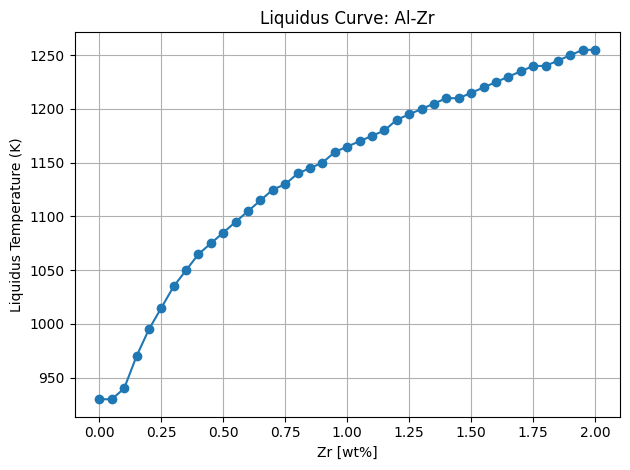

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pycalphad import Database, equilibrium, variables as v
import warnings
warnings.filterwarnings('ignore')

# Load database
dbf_directory = r'C:\PythonCode\Environments\Calphad\pycalphad\pycalphad codes\1 - databases\\'
dbf = Database(dbf_directory + 'COST507_Sundman.tdb')

components = ['AL', 'ZR', 'VA']
phases = ['LIQUID', 'FCC_A1', 'AL3ZR']  # Add other relevant phases if needed
# phases = list(dbf.phases.keys())

# Temperature and pressure range
temps = np.linspace(1300, 900, 81)  # from high to low temperature
pressure = 101325  # 1 atm

# Composition range
zr_comps = np.linspace(0.000, 2, 41)

# Output storage
liq_line = []

for wt_zr in zr_comps:  # zr_comps is in wt%
    mass_fracs = {v.W('ZR'): wt_zr / 100}  # convert percentage to fraction
    
    # Convert mass fractions to mole fractions dict
    mole_fracs = v.get_mole_fractions(mass_fracs, 'AL', dbf)
    
    xzr = mole_fracs[v.X('ZR')]  # mole fraction of Zr
    
    liquid_temps = []
    for temp in temps:
        eq = equilibrium(
            dbf, components, phases,
            conditions={v.X('ZR'): xzr, v.T: temp, v.P: pressure},
            output='GM',
        )
        stable = set(str(phase) for phase in eq.Phase.values.flatten() if phase is not None)
        print(f"xzr={xzr:.6f}, T={temp:.2f}K, phases={stable}")
        if 'AL3ZR' in stable or 'FCC_A1' in stable:
            # if 'AL3ZR' & 'FCC_A1' in stable:
            liquid_temps.append(temp)
    
    if liquid_temps:
        liquidus_temp = max(liquid_temps)
        print(f"✔ Liquidus at wt% Zr={wt_zr:.2f}: T={liquidus_temp:.2f}K")
        liq_line.append((wt_zr, liquidus_temp))  # store wt% for x-axis
    else:
        print(f"✘ No liquidus found at wt% Zr={wt_zr:.2f}")



# Convert and plot
liq_line = np.array(liq_line)
if liq_line.size > 0:
    plt.plot(liq_line[:, 0], liq_line[:, 1], marker='o')
    plt.xlabel('Zr [wt%]')
    plt.ylabel('Liquidus Temperature (K)')
    plt.title('Liquidus Curve: Al-Zr')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("⚠ No liquidus temperatures detected in the given range.")


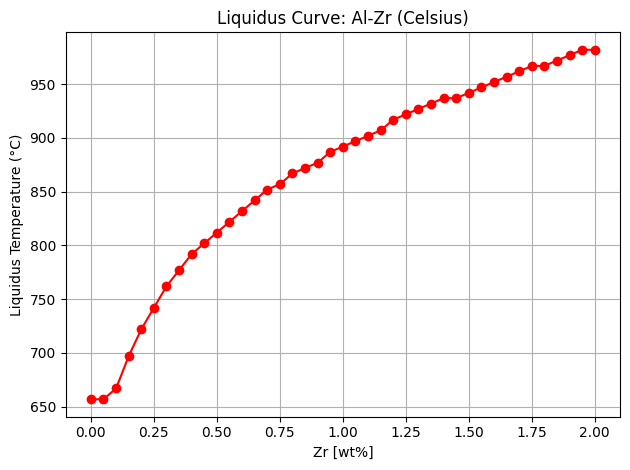

In [9]:
# After your existing plotting code for Kelvin

if liq_line.size > 0:
    # Plot in Kelvin (you already have this)
    # plt.figure()
    # plt.plot(liq_line[:, 0], liq_line[:, 1], marker='o')
    # plt.xlabel('Zr [wt%]')
    # plt.ylabel('Liquidus Temperature (K)')
    # plt.title('Liquidus Curve: Al-Zr (Kelvin)')
    # plt.grid(True)
    # plt.tight_layout()
    
    # Plot in Celsius
    plt.figure()
    plt.plot(liq_line[:, 0], liq_line[:, 1] - 273.15, marker='o', color='red')
    plt.xlabel('Zr [wt%]')
    plt.ylabel('Liquidus Temperature (°C)')
    plt.title('Liquidus Curve: Al-Zr (Celsius)')
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()


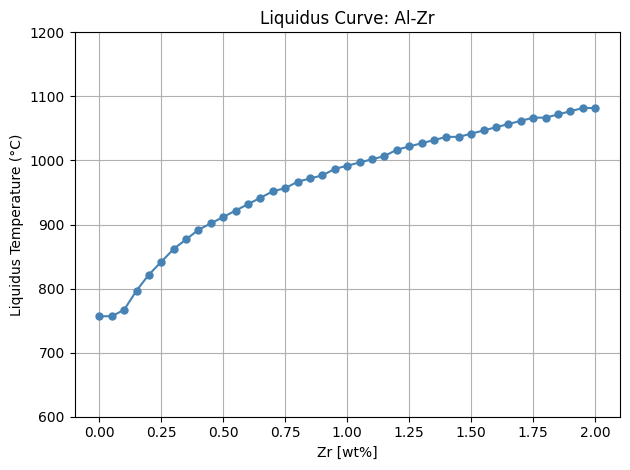

In [30]:
if liq_line.size > 0:
    # Shift temperatures by +100 °C
    shifted_temps = liq_line[:, 1] - 273.15 + 100
    
    plt.figure()
    plt.plot(liq_line[:, 0], shifted_temps, marker ='o',  markersize=5, color='steelblue')  # No markers, just a line
    plt.xlabel('Zr [wt%]')
    plt.ylabel('Liquidus Temperature (°C)')
    plt.title('Liquidus Curve: Al-Zr')
    plt.ylim(600, 1200)
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()


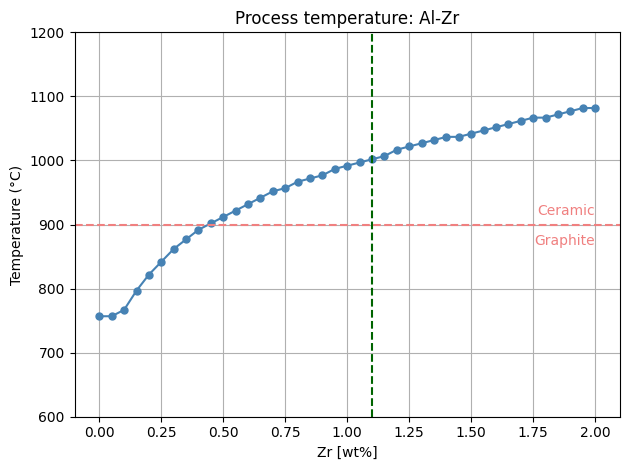

In [48]:
if liq_line.size > 0:
    # Shift temperatures by +100 °C
    shifted_temps = liq_line[:, 1] - 273.15 + 100
    
    plt.figure()
    plt.plot(liq_line[:, 0], shifted_temps, marker='o', markersize=5, color='steelblue')
    
    # Add horizontal line at 900 °C
    plt.axhline(900, color='lightcoral', linestyle='--', linewidth=1.5)
    
    # Add vertical line at Zr = 1.1 wt%
    plt.axvline(1.1, color='darkgreen', linestyle='--', linewidth=1.5)
    
    # Label "Graphite" below the horizontal line at right edge
    plt.text(
        x=liq_line[:, 0].max(),  # rightmost x-position
        y=900 - 15,              # slightly below the line
        s='Graphite',
        color='lightcoral',
        fontsize=10,
        ha='right',
        va='top'
    )
    
    # Label "Ceramic" above the horizontal line at the same x-position
    plt.text(
        x=liq_line[:, 0].max(),  # same rightmost x-position as Graphite
        y=900 + 10,              # slightly above the line
        s='Ceramic',
        color='lightcoral',
        fontsize=10,
        ha='right',
        va='bottom'
    )
    
    plt.xlabel('Zr [wt%]')
    plt.ylabel('Temperature (°C)')
    plt.title('Process temperature: Al-Zr')
    plt.ylim(600, 1200)
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()


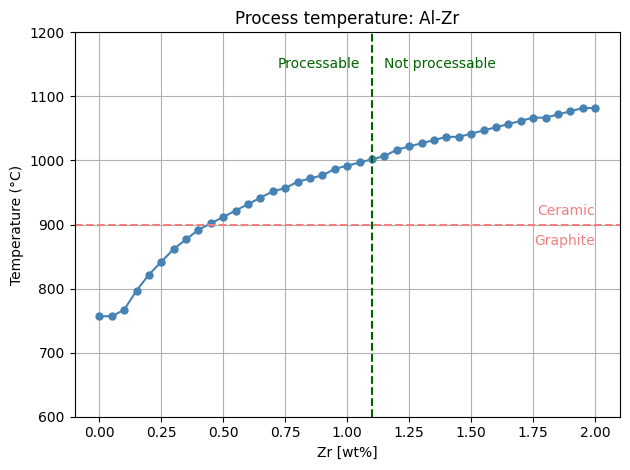

In [50]:
if liq_line.size > 0:
    # Shift temperatures by +100 °C
    shifted_temps = liq_line[:, 1] - 273.15 + 100

    plt.figure()
    plt.plot(liq_line[:, 0], shifted_temps, marker='o', markersize=5, color='steelblue')

    # Add horizontal line at 900 °C
    plt.axhline(900, color='lightcoral', linestyle='--', linewidth=1.5)

    # Add vertical line at Zr = 1.1 wt%
    plt.axvline(1.1, color='darkgreen', linestyle='--', linewidth=1.5)

    # Label "Graphite" below the horizontal line
    plt.text(
        x=liq_line[:, 0].max(),
        y=900 - 15,
        s='Graphite',
        color='lightcoral',
        fontsize=10,
        ha='right',
        va='top'
    )

    # Label "Ceramic" above the horizontal line
    plt.text(
        x=liq_line[:, 0].max(),
        y=900 + 10,
        s='Ceramic',
        color='lightcoral',
        fontsize=10,
        ha='right',
        va='bottom'
    )

    # Label "Processable" to the left of vertical line
    plt.text(
        x=1.1 - 0.05,
        y=1150,
        s='Processable',
        color='darkgreen',
        fontsize=10,
        ha='right',
        va='center'
    )

    # Label "Not processable" to the right of vertical line
    plt.text(
        x=1.1 + 0.05,
        y=1150,
        s='Not processable',
        color='darkgreen',
        fontsize=10,
        ha='left',
        va='center'
    )

    plt.xlabel('Zr [wt%]')
    plt.ylabel('Temperature (°C)')
    plt.title('Process temperature: Al-Zr')
    plt.ylim(600, 1200)
    plt.grid(True)
    plt.tight_layout()

    plt.show()


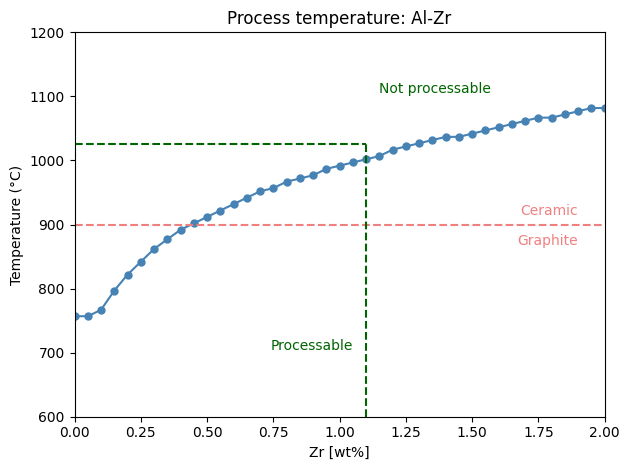

In [65]:
if liq_line.size > 0:
    # Shift temperatures by +100 °C
    shifted_temps = liq_line[:, 1] - 273.15 + 100

    plt.figure()
    plt.plot(liq_line[:, 0], shifted_temps, marker='o', markersize=5, color='steelblue')

    # Add horizontal line at 900 °C
    plt.axhline(900, color='lightcoral', linestyle='--', linewidth=1.5)

    # Add vertical line from 600 to 1000 °C at Zr = 1.1 wt%
    plt.vlines(1.1, ymin=600, ymax=1025, color='darkgreen', linestyle='--', linewidth=1.5)

    # Add horizontal line at 1000 °C from left to Zr = 1.1 wt%
    plt.hlines(1025, xmin=liq_line[:, 0].min(), xmax=1.1, color='darkgreen', linestyle='--', linewidth=1.5)

    # Label "Graphite" below the horizontal line
    plt.text(
        x=1.9,
        y=900 - 15,
        s='Graphite',
        color='lightcoral',
        fontsize=10,
        ha='right',
        va='top'
    )

    # Label "Ceramic" above the horizontal line
    plt.text(
        x=1.9,
        y=900 + 10,
        s='Ceramic',
        color='lightcoral',
        fontsize=10,
        ha='right',
        va='bottom'
    )

    # Label "Processable" to the left of vertical line
    plt.text(
        x=1.1 - 0.05,
        y=700,
        s='Processable',
        color='darkgreen',
        fontsize=10,
        ha='right',
        va='bottom'
    )

    # Label "Not processable" to the right of vertical line
    plt.text(
        x=1.1 + 0.05,
        y=1100,
        s='Not processable',
        color='darkgreen',
        fontsize=10,
        ha='left',
        va='bottom'
    )

    plt.xlabel('Zr [wt%]')
    plt.ylabel('Temperature (°C)')
    plt.title('Process temperature: Al-Zr')
    plt.ylim(600, 1200)
    plt.xlim(0, 2)
    plt.xlim(left=0)  # Start X-axis at 0
    plt.grid(False)
    plt.tight_layout()

    # Save the figure as PNG with high resolution
    plt.savefig('Processing temperature.png', dpi=300, bbox_inches='tight')

    plt.show()


### Data into a CSV

In [67]:
import pandas as pd

# Prepare DataFrame
df = pd.DataFrame({
    'Zr_wt%': liq_line[:, 0],
    'Liquidus_Temp_K': liq_line[:, 1],
    'Liquidus_Temp_C': liq_line[:, 1] - 273.15,
})

# Save to CSV
csv_path = 'liquidus_al_zr.csv'
df.to_csv(csv_path, index=False)

print(f"Data saved to {csv_path}")


Data saved to liquidus_al_zr.csv
